In [253]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

In [254]:
df_train = pd.read_csv("train_ctrUa4K.csv")
df_test = pd.read_csv("test_lAUu6dG.csv")

In [255]:
df_train.shape

(614, 13)

In [256]:
df_test.shape

(367, 12)

In [257]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [258]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [259]:
df_train["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [260]:
def all_value_counts(df):
    for x in df.columns:
        print('Column : ',x)
        print('Value Count : ',df[x].value_counts())
        print('Unique values in column : ',x, 'are', df[x].unique())
    return

In [261]:
all_value_counts(df_train)

Column :  Loan_ID
Value Count :  LP001233    1
LP001580    1
LP001098    1
LP002524    1
LP002348    1
           ..
LP001273    1
LP002533    1
LP001546    1
LP001836    1
LP001041    1
Name: Loan_ID, Length: 614, dtype: int64
Unique values in column :  Loan_ID are ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP0012

In [262]:
df_train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [263]:
df_train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [264]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [265]:
df_test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [266]:
df_train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [267]:
df_train['source']='train'
df_test['source']='test'

In [268]:
df_all=pd.concat([df_train,df_test])

In [269]:
df_all.shape

(981, 14)

In [270]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [271]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
source                0
dtype: int64

In [272]:
# Since the coapplicant income is > 0, married status is filled with Yes

In [273]:
df_all.loc[((df_all['Married'].isnull()) & (df_all['CoapplicantIncome'] > 0 )),['Married']]='Yes'

In [274]:
# Since there is no co-applicant income & no dependents or null, the married status is filled with NO

In [275]:
df_all.loc[(df_all['Married'].isnull()),['Married']]='No'

In [276]:
# Gender is replaced null with Male for records where dependents is not 0

In [277]:
df_all.loc[((df_all['Gender'].isnull()) & (df_all['Dependents'] != '0')),['Gender']]='Male'

In [278]:
df_all[((df_all['Gender'].isnull()) & (df_all['source']=='train'))]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y,train
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N,train
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y,train
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y,train
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N,train
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N,train
588,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y,train


In [279]:
df_all['Gender'].value_counts()

Male      785
Female    182
Name: Gender, dtype: int64

In [280]:
# since the mode for the gender is Male, filling up the null with Male

In [281]:
df_all=df_all.fillna({'Gender':'Male'})

In [282]:
df_all['Gender'].value_counts()

Male      799
Female    182
Name: Gender, dtype: int64

In [283]:
df_all['Married'].value_counts()

Yes    632
No     349
Name: Married, dtype: int64

In [284]:
# filling up the 'Married' status as 'Yes' for the null value  as they form the most 

In [285]:
df_all=df_all.fillna({'Married':'Yes'})

In [286]:
df_all.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [287]:
df_all['Dependents'].value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [288]:
# filling up the Dependents null value with 0 as they form the most

In [289]:
df_all=df_all.fillna({'Dependents':'0'})

In [290]:
df_all['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [291]:
# filling up the Self_Employed as No, as most of the applicants are employed

In [292]:
df_all=df_all.fillna({'Self_Employed':'Yes'})

In [293]:
df_all['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [294]:
# since credit history is null, defaulting to 0

In [295]:
df_all=df_all.fillna({'Credit_History':0.0})

In [296]:
df_all['LoanAmount']=df_all.groupby(by=['Property_Area']).LoanAmount.transform(lambda x: x.fillna(x.mean()))

In [297]:
df_all.groupby(by=['Property_Area']).Loan_Amount_Term.value_counts()

Property_Area  Loan_Amount_Term
Rural          360.0               249
               180.0                17
               300.0                 6
               480.0                 4
               84.0                  3
               240.0                 3
               12.0                  1
               350.0                 1
Semiurban      360.0               300
               180.0                19
               480.0                 9
               300.0                 8
               36.0                  3
               120.0                 2
               240.0                 2
               6.0                   1
               84.0                  1
Urban          360.0               274
               180.0                30
               480.0                10
               300.0                 6
               60.0                  3
               84.0                  3
               240.0                 3
               120.0            

In [298]:
df_all['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [299]:
# Since 360 is most occured loan term, the same is defaulted for null values

In [300]:
df_all['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [301]:
df_all=df_all.fillna({'Loan_Amount_Term':360})

In [302]:
df_all.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
dtype: int64

In [303]:
df_all["Gender"] = np.where(df_all["Gender"]=="Male",1,0)

In [304]:
df_all['Married'] = np.where(df_all["Married"]=='Yes',1,0)

In [305]:
df_all['Loan_ID']=df_all['Loan_ID'].str.slice(2, 9)

In [306]:
df_all["Dependents"]=np.where(df_all["Dependents"]=='0',0,(np.where(df_all["Dependents"]=='1',1,(np.where(df_all["Dependents"]=='2',2,3)))))

In [307]:
df_all["Education"]=np.where(df_all["Education"]=='Graduate',1,0)

In [308]:
df_all["Self_Employed"]=np.where(df_all["Self_Employed"]=='Yes',1,0)

In [309]:
df_all["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [310]:
df_all["Loan_Status"]=np.where(df_all["Loan_Status"]=='Y',1,0)

In [340]:
df_all["Loan_Status"].value_counts()

0    559
1    422
Name: Loan_Status, dtype: int64

In [311]:
df_all

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,001002,1,0,0,1,0,5849,0.0,139.693009,360.0,1.0,Urban,1,train
1,001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,train
2,001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1,train
3,001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,train
4,001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,002971,1,1,3,0,1,4009,1777.0,113.000000,360.0,1.0,Urban,0,test
363,002975,1,1,0,1,0,4158,709.0,115.000000,360.0,1.0,Urban,0,test
364,002980,1,0,0,1,0,3250,1993.0,126.000000,360.0,0.0,Semiurban,0,test
365,002986,1,1,0,1,0,5000,2393.0,158.000000,360.0,1.0,Rural,0,test


In [312]:
df_all['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [313]:
df_category_encode = pd.get_dummies(df_all["Property_Area"])

In [314]:
df_category_encode.isnull().sum()

Rural        0
Semiurban    0
Urban        0
dtype: int64

In [315]:
df_all=df_all.drop(columns=['Property_Area'])

In [316]:
df_final=pd.concat([df_all,df_category_encode],axis=1)

In [317]:
df_final.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,source,Rural,Semiurban,Urban
0,001002,1,0,0,1,0,5849,0.0,139.693009,360.0,1.0,1,train,0,0,1
1,001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,train,1,0,0
2,001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,train,0,0,1
3,001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,train,0,0,1
4,001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,train,0,0,1


In [318]:
df_train_preprocessed=df_final[df_final['source']=='train']

In [319]:
del df_train_preprocessed['source']

In [320]:
df_train_preprocessed.shape

(614, 15)

In [321]:
df_test_preprocessed=df_final[df_final['source']=='test']

In [322]:
del df_test_preprocessed['source']

In [323]:
df_test_preprocessed.shape

(367, 15)

In [324]:
train_x = df_train_preprocessed.drop(columns=['Loan_Status'])

In [325]:
train_y = df_train_preprocessed['Loan_Status']

In [326]:
train_y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [327]:
test_x = df_test_preprocessed.drop(columns=["Loan_Status"])

In [336]:
test_y=df_test_preprocessed['Loan_Status']

In [328]:
model = LogisticRegression()

In [329]:
model.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_this_model()

In [330]:
model.coef_

array([[ 4.70689523e-05,  1.17375643e-01,  4.44345732e-01,
        -8.23726317e-02,  4.18304452e-01,  5.17016574e-02,
        -4.80263211e-06, -4.34907653e-05, -1.18822176e-03,
        -3.31059171e-03,  1.86722207e+00, -3.91393595e-01,
         5.80485877e-01, -1.12643906e-01]])

In [331]:
model.intercept_

array([0.07752885])

In [333]:
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

In [334]:
def metric_res(acctual, pred):
    print("confusion_matrix ", confusion_matrix(acctual, pred))
    print("accuracy_score ", accuracy_score(acctual, pred))
    print("recall_score", recall_score(acctual, pred))
    print("precision_score ", precision_score(acctual, pred))
    print("f1_score", f1_score(acctual, pred))
    print("roc_auc_score", roc_auc_score(acctual, pred))
    print("classification report \n", classification_report(acctual, pred))

In [335]:
metric_res(train_y,train_pred)

confusion_matrix  [[ 84 108]
 [ 37 385]]
accuracy_score  0.7638436482084691
recall_score 0.9123222748815166
precision_score  0.7809330628803245
f1_score 0.8415300546448088
roc_auc_score 0.6749111374407584
classification report 
               precision    recall  f1-score   support

           0       0.69      0.44      0.54       192
           1       0.78      0.91      0.84       422

    accuracy                           0.76       614
   macro avg       0.74      0.67      0.69       614
weighted avg       0.75      0.76      0.75       614



In [339]:
test_y.value_counts()

0    367
Name: Loan_Status, dtype: int64

In [343]:
test_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [352]:
sample_out=pd.concat([test_x['Loan_ID'],pd.DataFrame(test_pred)],axis=1)

In [353]:
sample_out.head()

,Loan_ID,0
0,001015,1
1,001022,1
2,001031,1
3,001035,0
4,001051,1


In [354]:
sample_out.rename(columns={0:"Loan_Status"},inplace='True')

In [355]:
sample_out.head()

,Loan_ID,Loan_Status
0,001015,1
1,001022,1
2,001031,1
3,001035,0
4,001051,1


In [356]:
sample_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loan_ID      367 non-null    object
 1   Loan_Status  367 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 7.2+ KB


In [359]:
sample_out['Loan_Status']=np.where(sample_out['Loan_Status']==1,'Y','N')

In [351]:
sample_out.head()

,Loan_ID,Loan_Status
0,001015,N
1,001022,N
2,001031,N
3,001035,N
4,001051,N


In [360]:
sample_out['Loan_ID'] = 'LP' + sample_out['Loan_ID'].astype(str)

In [361]:
sample_out.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y


In [362]:
sample_out.to_csv('sample_submission_49d68Cx.csv',index=False)

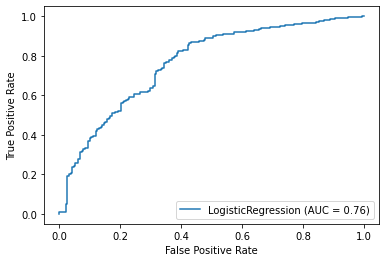

In [365]:
plot_roc_curve(model, train_x, train_y)